In [2]:
#Task 1: Data Preparation
# "You will start by loading the CSV data from the file (using appropriate pandas functions) and checking whether the loaded data is equivalent to the data in the source CSV file.
# Then, you need to clean the data by using the knowledge we taught in the lectures. You need to deal with all the potential issues/errors in the data appropriately (such as: typos, extra whitespaces, sanity checks for impossible values, and missing values etc). "

#load the data
import pandas as pd
Auto_file = "Automobile.csv"
df = pd.read_csv(Auto_file, sep='#',names=['Symboling','NormalizedLosses','Make','FuelType','Aspiration','NumOfDoors','BodyStyle','DriveWheels','EngineLocation','WheelBase','Length','Width','Height','CurbWeight','EngineType','NumOfCylinders','EngineSize','FuelSystem','Bore','Stroke','CompressionRatio','HorsePower','PeakRPM','CityMPG','HighwayMPG','Price'],index_col=False)


#check the values in the Symboling column
df['Symboling'].value_counts()

#drop the rows whose value contains outlier or impossible values for Symboling column
df = df.drop([205,218,231], axis=0) #dropped row whose value is 4 in symboling table


#check the data for how many null values are present in the Normalized Losses Column
cars_Nan=df[df['NormalizedLosses'].isnull()].groupby(df['Make'].str.lower().str.strip().str.replace('\d+','').str.replace('ov','vo'), as_index=False).size().reset_index()
cars_Nan 


#drop the record which contain null value in normalized columns
df = df.drop([0,1,2], axis=0)    #dropped row with make value alfa-romero
df = df.drop([43,44,45,46], axis=0)  #dropped row for isuzu
df = df.drop([75], axis=0) #dropped row for mercury
df = df.drop([130,131], axis=0) #dropped row for renault


#To clean the Make Column in the dataset
df['Make']=df['Make'].str.lower().str.strip().str.replace('\d+','').str.replace('ov','vo')

#Clean the Normalized Losses Column and remove all the null values

#created the mask for filtering the value audi and then calculated the mean and imputed the mean value in place of NaN
filter = df.Make == 'audi'  
audi = df[filter]
x = audi['NormalizedLosses'].groupby(audi['Make'].str.lower().str.strip().str.replace('\d+','').str.replace('ov','vo')).mean()
df.loc[(df['Make'] == 'audi') & (df['NormalizedLosses'].isnull()) , 'NormalizedLosses'] = round(x[0])

#created the mask for filtering the value bmw and then calculated the mean and imputed the mean value in place of NaN
filter = df.Make == 'bmw' 
bmw = df[filter]
y = bmw['NormalizedLosses'].groupby(bmw['Make'].str.lower().str.strip().str.replace('\d+','').str.replace('ov','vo')).mean()
df['NormalizedLosses'] = df['NormalizedLosses'].fillna(y[0], limit=4)
df.loc[(df['Make'] == 'bmw') & (df['NormalizedLosses'].isnull()) , 'NormalizedLosses'] = round(y[0])

#imputed the value 45 where value is null in Normalized column for make = jaguar
df.loc[(df['Make'] == 'jaguar') & (df['NormalizedLosses'].isnull()) , 'NormalizedLosses'] = 145

#created the mask for filtering the value mazda and then calculated the mean and imputed the mean value in place of NaN
filter = df.Make == 'mazda'  #applied the condition on vehicle = mazda
mazda = df[filter]
a = mazda['NormalizedLosses'].groupby(mazda['Make'].str.lower().str.strip().str.replace('\d+','').str.replace('ov','vo')).mean()
df.loc[(df['Make'] == 'mazda') & (df['NormalizedLosses'].isnull()) , 'NormalizedLosses'] = round(a[0])

#created the mask for filtering the value mercedes-benz and then calculated the mean and imputed the mean value in place of NaN
filter = df.Make == 'mercedes-benz'  
mercedes_benz = df[filter]
b = mercedes_benz['NormalizedLosses'].groupby(mercedes_benz['Make'].str.lower().str.strip().str.replace('\d+','').str.replace('ov','vo')).mean()
df.loc[(df['Make'] == 'mercedes-benz') & (df['NormalizedLosses'].isnull()) , 'NormalizedLosses'] = round(b[0])

#created the mask for filtering the value mitsubishi and then calculated the mean and imputed the mean value in place of NaN
filter = df.Make == 'mitsubishi' 
mitsubishi = df[filter]
c = mitsubishi['NormalizedLosses'].groupby(mitsubishi['Make'].str.lower().str.strip().str.replace('\d+','').str.replace('ov','vo')).mean()
df.loc[(df['Make'] == 'mitsubishi') & (df['NormalizedLosses'].isnull()) , 'NormalizedLosses'] = round(c[0])

#created the mask for filtering the value peugot and then calculated the mean and imputed the mean value in place of NaN
filter = df.Make == 'peugot'  
peugot = df[filter]
d = peugot['NormalizedLosses'].groupby(peugot['Make'].str.lower().str.strip().str.replace('\d+','').str.replace('ov','vo')).mean()
df.loc[(df['Make'] == 'peugot') & (df['NormalizedLosses'].isnull()) , 'NormalizedLosses'] = d[0]

#created the mask for filtering the value plymouth and then calculated the mean and imputed the mean value in place of NaN
filter = df.Make == 'plymouth'  #applied the condition on vehicle = plymouth
plymouth = df[filter]
e = plymouth['NormalizedLosses'].groupby(plymouth['Make'].str.lower().str.strip().str.replace('\d+','').str.replace('ov','vo')).mean()
df.loc[(df['Make'] == 'plymouth') & (df['NormalizedLosses'].isnull()) , 'NormalizedLosses'] = round(e[0])

#imputed the value 186 where value is null in Normalized column for make = porsche
df.loc[(df['Make'] == 'porsche') & (df['NormalizedLosses'].isnull()) , 'NormalizedLosses'] = 186

#created the mask for filtering the value toyota and then calculated the mean and imputed the mean value in place of NaN
filter = df.Make == 'toyota'  #applied the condition on vehicle = toyota
toyota = df[filter]
g = toyota['NormalizedLosses'].groupby(toyota['Make'].str.lower().str.strip().str.replace('\d+','').str.replace('ov','vo')).mean()
df.loc[(df['Make'] == 'toyota') & (df['NormalizedLosses'].isnull()) , 'NormalizedLosses'] = round(g[0])

#created the mask for filtering the value volkswagen and then calculated the mean and imputed the mean value in place of NaN
filter = df.Make == 'volkswagen'  
volkswagen = df[filter]
h = volkswagen['NormalizedLosses'].groupby(volkswagen['Make'].str.lower().str.strip().str.replace('\d+','').str.replace('ov','vo')).mean()
df.loc[(df['Make'] == 'volkswagen') & (df['NormalizedLosses'].isnull()) , 'NormalizedLosses'] = round(h[0])

#created the mask for filtering the value volvo and then calculated the median and imputed the median value in place of NaN
filter = df.Make == 'volvo'  #applied the condition on vehicle = volkswagen
volvo = df[filter]
i = volvo['NormalizedLosses'].groupby(volvo['Make'].str.lower().str.strip().str.replace('\d+','').str.replace('ov','vo')).median()
df.loc[(df['Make'] == 'volvo') & (df['NormalizedLosses'].isnull()) , 'NormalizedLosses'] = round(i[0])

#replace the outlier value with median value
df['NormalizedLosses'] = df['NormalizedLosses'].replace(25,i[0]) 


#Recheck whether all the null values are removed or filled with central tendency
cars_Nan=df[df['NormalizedLosses'].isnull()].groupby(df['Make'].str.lower().str.strip().str.replace('\d+','').str.replace('ov','vo'), as_index=False).size().reset_index()
cars_Nan


#checking the typos, missing values and impossible values for Fuel System Column
df['FuelType'].value_counts()

#cleaning the fuel type column
df['FuelType'] = df['FuelType'].str.lower().str.strip()

#checking the typos, missing values and impossible values for Aspiration Column
df['Aspiration'].value_counts()

#cleaning the Aspiration column
df['Aspiration'] = df['Aspiration'].str.lower().str.strip().str.replace('rrrr','r')


#checking the typos, missing values and impossible values for Number of Doors Column
df['NumOfDoors'].value_counts()

#cleaning the Number of Doors column
df['NumOfDoors'] = df['NumOfDoors'].str.lower().str.strip().str.replace('rR','r').str.replace('rr','r').fillna('four')

#checking the typos, missing values and impossible values for Body Style Column
df['BodyStyle'].value_counts()

#cleaning the Body Style column
df['BodyStyle'] = df['BodyStyle'].str.lower().str.strip()

#checking the typos, missing values and impossible values for Drive Wheels Column
df['DriveWheels'].value_counts()

#cleaning the Drive Wheels column
df['DriveWheels'] = df['DriveWheels'].str.lower().str.strip()

#checking the typos, missing values and impossible values for Engine Location Column
df['EngineLocation'].value_counts()

#cleaning the Engine Location column
df['EngineLocation'] = df['EngineLocation'].str.lower().str.strip()


#check the null values for 
df['WheelBase'].count()
df['Width'].count()
df['Height'].count()
df['CurbWeight'].count()
df['CurbWeight'].count()
df['EngineSize'].count()


#checking the typos, missing values and impossible values for Engine Location Column
df['EngineType'].value_counts()

#cleaning the Engine Location column
df['EngineType'] = df['EngineType'].str.lower().str.strip()


#checking the typos, missing values and impossible values for Number of Cylinder Column
df['NumOfCylinders'].count()


#cleaning the Number of Cylinder column
df['NumOfCylinders']=df['NumOfCylinders'].str.lower().str.strip()



#checking the typos, missing values and impossible values for Fuel System Column
df['FuelSystem'].value_counts()

#cleaning the Fuel System column
df['FuelSystem'] = df['FuelSystem'].str.lower().str.strip()

#checking the Bore column for null values
df['Bore'].count()

#imputing the mean value in place of null value in stroke column
filter = df.Make == 'mazda'
x = df[filter].Stroke.mean()
x
df['Stroke'] = df['Stroke'].fillna(round(x,2))

#checking the null values in all these colum
df['CompressionRatio'].count()
df['HorsePower'].count()
df['PeakRPM'].count()
df['HighwayMPG'].count()

#checking the null values in price colum
df['Price'].isnull().sum()

#cleaning price column

#impute mean value on price column by creating mask of make = audi
filter = df.Make == 'audi'  
audi = df[filter]
f = audi['Price'].groupby(audi['Make'].str.lower().str.strip().str.replace('\d+','').str.replace('ov','vo')).mean()
df['Price'] = df['Price'].fillna(round(f[0]), limit=1)

#impute mean value on price column by creating mask of make = porsche
filter = df.Make == 'porsche'  #applied the condition on vehicle = porsche
porsche = df[filter]
p = porsche['Price'].groupby(porsche['Make'].str.lower().str.strip().str.replace('\d+','').str.replace('ov','vo')).mean()
df['Price'] = df['Price'].fillna(round(p[0]), limit=1)


#replace 0 value in price column with median of the value
filter = df.Make == 'volvo' 
volvo = df[filter]
vo = volvo['Price'].groupby(volvo['Make'].str.lower().str.strip().str.replace('\d+','').str.replace('ov','vo')).median()
vo[0]

df['Price'] = df['Price'].replace(0,vo[0])
# Please structure code as follows: 
# always provide one line of comments to explain the purpose of the code, e.g. load the data, checking the equivalent to original data, checking typos (do this for each other types of errors)

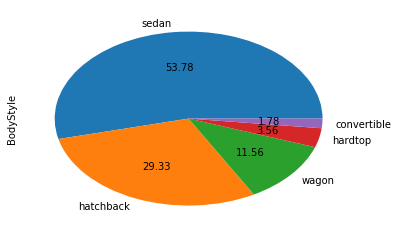

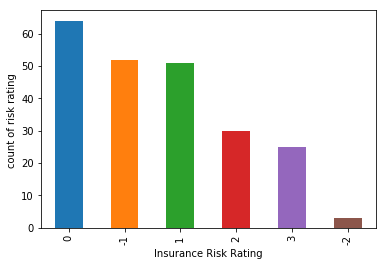

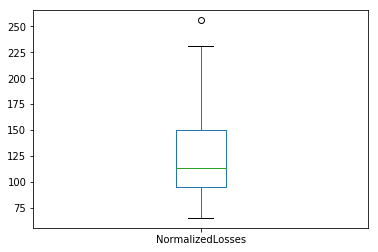

In [3]:
# Task 2: Data Exploration
# 1. Choose 1 column with nominal values, 1 column with ordinal Values, and 1 column with numerical values
#Code goes after this line

import matplotlib.pyplot as plt
%matplotlib inline



#Nominal Value Column
df['BodyStyle'].value_counts().plot(kind='pie',autopct='%.2f')
plt.show()




#ordinal value column
df['Symboling'].value_counts().plot(kind='bar')
plt.xlabel("Insurance Risk Rating")
plt.ylabel("count of risk rating ")
plt.show()



#Numeric value column
df['NormalizedLosses'].plot(kind='box')
plt.show()





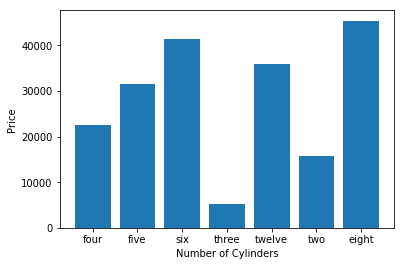

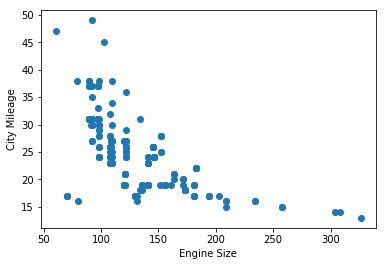

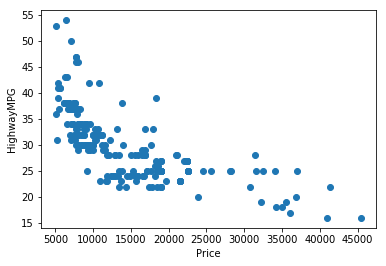

In [4]:
 # Task 2: Data Exploration
# 2. Explore the relationships between columns; at least 3 visualisations with plausible hypothesis

#Code goes after this line


#relation between Number of Cylinders and Price
plt.bar(df['NumOfCylinders'], df['Price'])
plt.xlabel("Number of Cylinders")
plt.ylabel("Price")
plt.show()


#relation between Number of Engine Size and CityMPG
plt.scatter(df['EngineSize'], df['CityMPG'])
plt.xlabel("Engine Size")
plt.ylabel("City Mileage")
plt.show()

#relation between Number of PeakRPM and HorsePower
plt.scatter( df['Price'], df['HighwayMPG'])
plt.xlabel("Price")
plt.ylabel("HighwayMPG")
plt.show()




C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  after removing the cwd from sys.path.


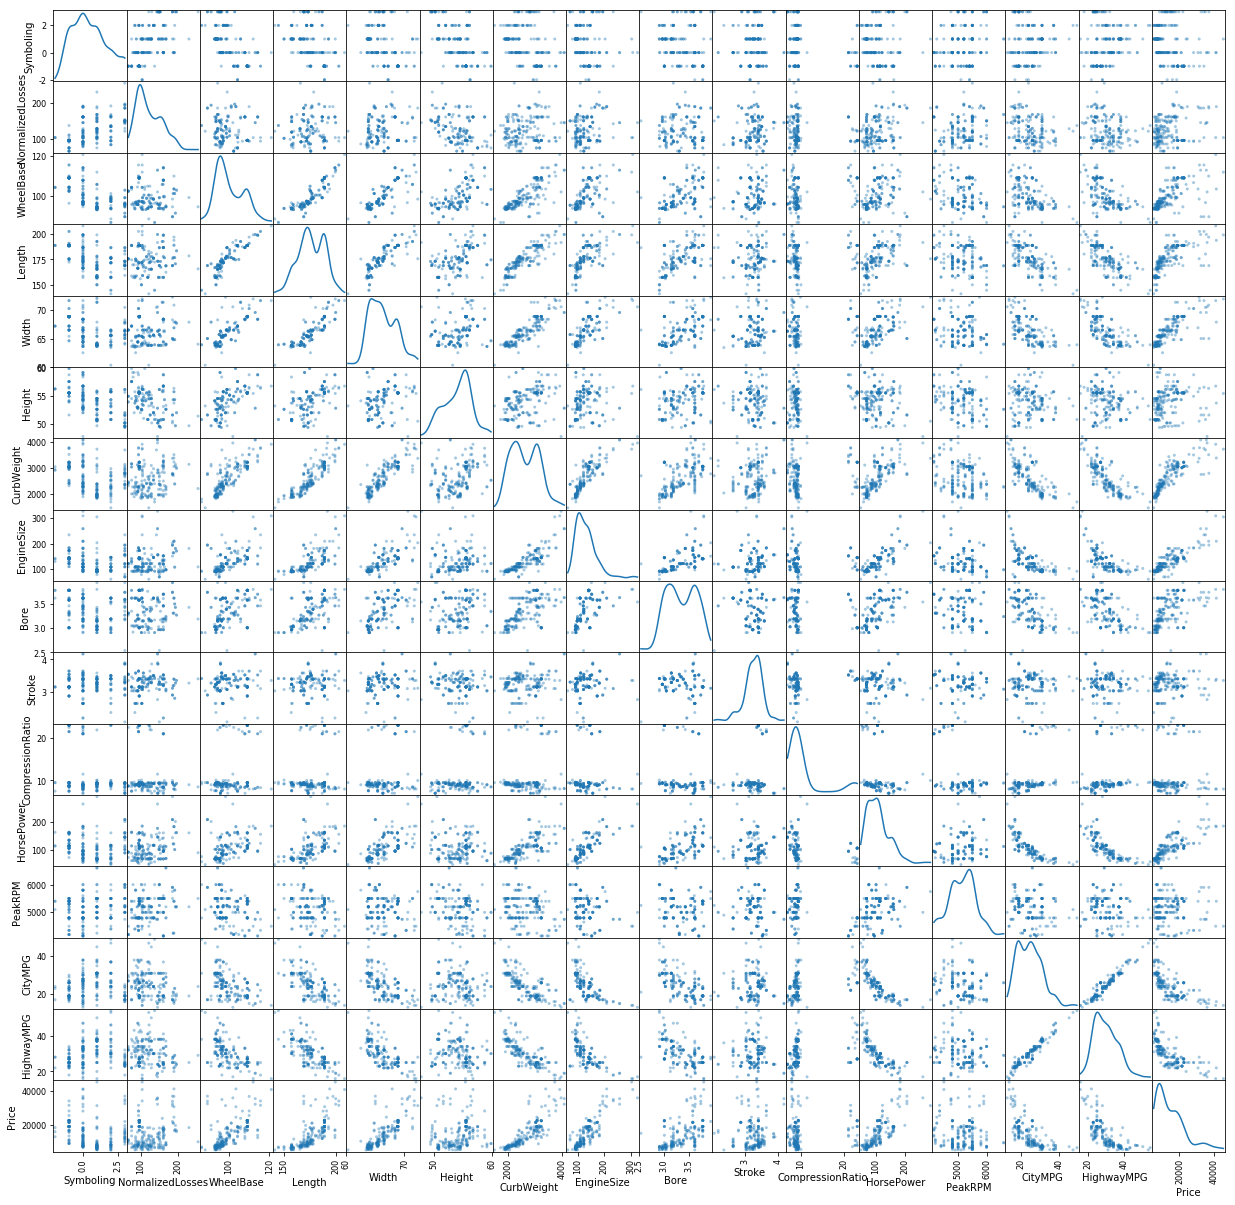

In [19]:
# Task 2: Data Exploration
# 3. Scatter matrix for all numerical columns
from pandas.tools.plotting import scatter_matrix
scatter_matrix(df,alpha=0.4,figsize=(21,21),diagonal='density')
plt.show()
#Code goes after this line